/var/folders/5g/dxyz07h551b0md8v8dx0w1w80000gn/T/ipykernel_51201/3203022310.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_temp = pd.read_csv(berkeley_path, comment='%', delim_whitespace=True, header=None)


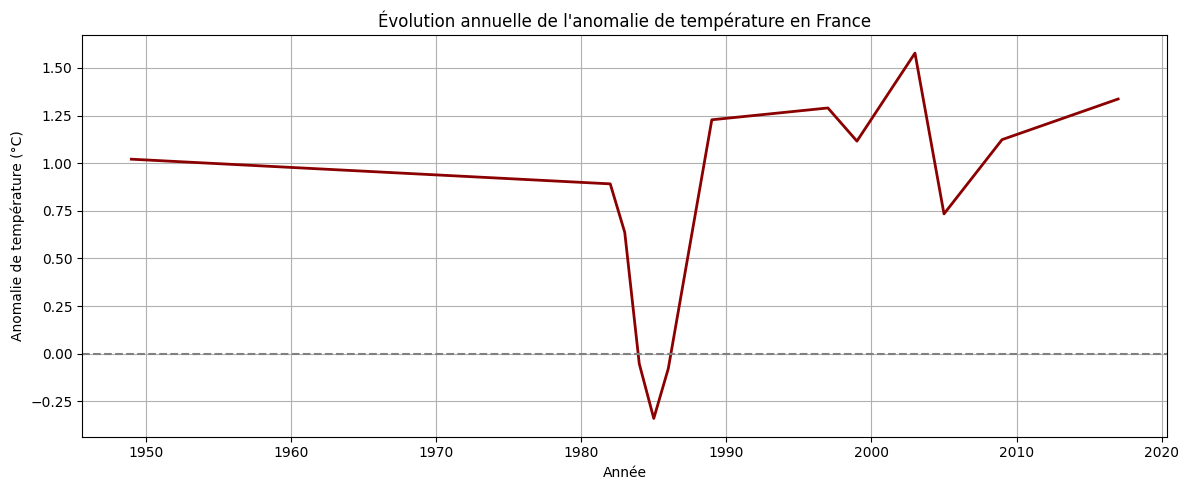

In [1]:
# -----------------------------
# PHASE 2 – TP3 CLIMAT - FRANCE
# Analyse exploratoire & Prétraitement
# -----------------------------

# 📚 Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 📂 Chargement des fichiers
berkeley_path = "/Users/jeniferawounou/Desktop/france-(europe)-TAVG-Trend-bon.txt"
emdat_path = "/Users/jeniferawounou/Desktop/public_emdat_custom_request_2025-04-01_955b1370-4c28-4320-97f2-9b207c3e884d.xlsx"

# Températures Berkeley Earth
df_temp = pd.read_csv(berkeley_path, comment='%', delim_whitespace=True, header=None)
df_temp.columns = [
    "Year", "Month", "Monthly_Anomaly", "Monthly_Unc",
    "Annual_Anomaly", "Annual_Unc", "FiveYear_Anomaly", "FiveYear_Unc",
    "TenYear_Anomaly", "TenYear_Unc", "TwentyYear_Anomaly", "TwentyYear_Unc"
]
df_temp['Date'] = pd.to_datetime(dict(year=df_temp.Year, month=df_temp.Month, day=1))

# Catastrophes naturelles EM-DAT
df_disasters = pd.read_excel(emdat_path, engine="openpyxl")
df_disasters['Country'] = df_disasters['Country'].str.strip().str.lower()
df_france = df_disasters[df_disasters['Country'] == 'france']

# 📊 Agrégation des catastrophes par année
df_disasters_yearly = df_france.groupby('Start Year').agg({
    'Disaster Type': 'count',
    'Total Deaths': 'sum',
    "Total Damage ('000 US$)": 'sum'
}).reset_index()
df_disasters_yearly.columns = ['Year', 'Disaster_Count', 'Total_Deaths', 'Total_Damage']

# 🌡️ Moyenne annuelle des températures
df_temp_filtered = df_temp[df_temp['Year'] >= 1900]
df_temp_yearly = df_temp_filtered.groupby('Year').agg({
    'Monthly_Anomaly': 'mean'
}).reset_index()

# 🔁 Fusion des datasets
df_merged = pd.merge(df_temp_yearly, df_disasters_yearly, on='Year', how='inner')
df_clean = df_merged.dropna()

# -----------------------------
# 🧼 Étape 1 : Détection années extrêmes
# -----------------------------
temp_threshold = df_clean['Monthly_Anomaly'].quantile(0.90)
death_threshold = df_clean['Total_Deaths'].quantile(0.90)
damage_threshold = df_clean['Total_Damage'].quantile(0.90)

df_clean['Extreme_Heat'] = df_clean['Monthly_Anomaly'] > temp_threshold
df_clean['Extreme_Deaths'] = df_clean['Total_Deaths'] > death_threshold
df_clean['Extreme_Damage'] = df_clean['Total_Damage'] > damage_threshold

# -----------------------------
# 📈 Graphe 1 : Évolution température seule
# -----------------------------
plt.figure(figsize=(12, 5))
plt.plot(df_clean['Year'], df_clean['Monthly_Anomaly'], color='darkred', linewidth=2)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Évolution annuelle de l'anomalie de température en France")
plt.xlabel("Année")
plt.ylabel("Anomalie de température (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()



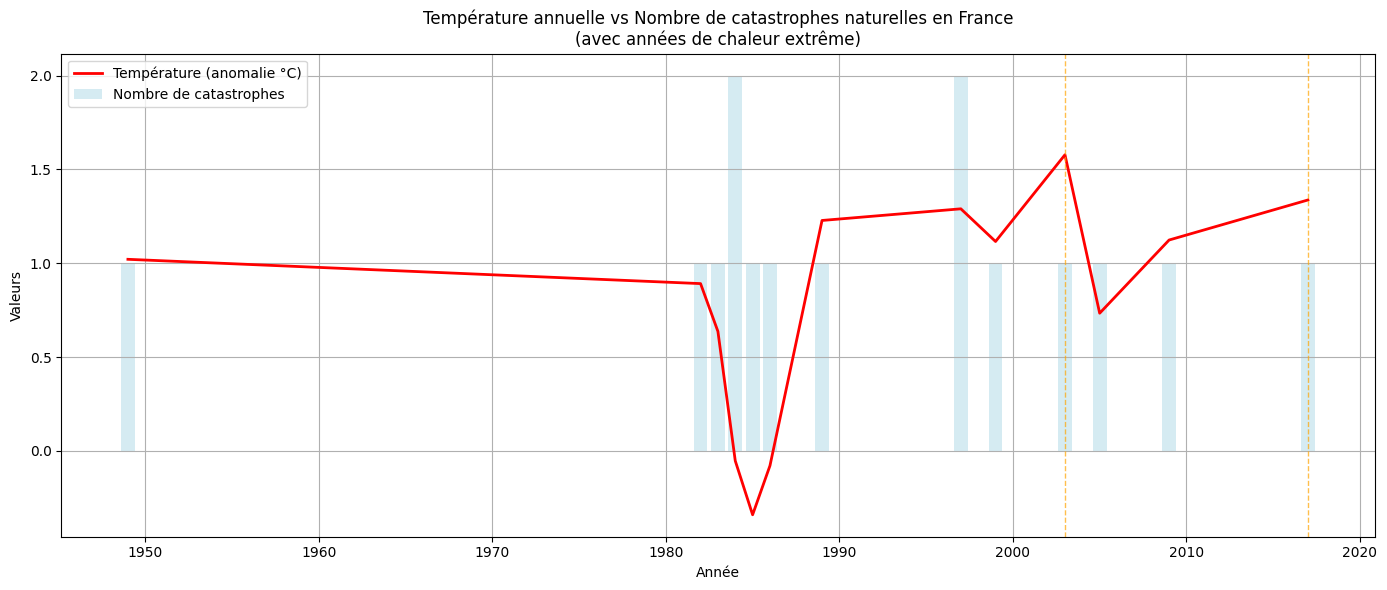

In [2]:
plt.figure(figsize=(14, 6))
plt.plot(df_clean['Year'], df_clean['Monthly_Anomaly'], color='red', label='Température (anomalie °C)', linewidth=2)
plt.bar(df_clean['Year'], df_clean['Disaster_Count'], color='lightblue', label='Nombre de catastrophes', alpha=0.5)

# Années de chaleur extrême
for i, row in df_clean[df_clean['Extreme_Heat']].iterrows():
    plt.axvline(x=row['Year'], color='orange', linestyle='--', alpha=0.7, linewidth=1)

plt.title("Température annuelle vs Nombre de catastrophes naturelles en France\n(avec années de chaleur extrême)")
plt.xlabel("Année")
plt.ylabel("Valeurs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
!pip install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 28.7 MB/s eta 0:00:00a 0:00:01


In [9]:
# Affichage des premières lignes de df_clean pour vérifier sa structure
df_clean.head()



,Year,Monthly_Anomaly,Disaster_Count,Total_Deaths,Total_Damage,Extreme_Heat,Extreme_Deaths,Extreme_Damage
0,1949,1.020917,1,80.0,0.0,False,True,False
1,1982,0.891417,1,2.0,0.0,False,False,False
2,1983,0.636667,1,12.0,0.0,False,True,False
3,1984,-0.053083,2,0.0,0.0,False,False,False
4,1985,-0.340500,1,6.0,0.0,False,False,False
